In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # plotting
import seaborn as sns  # advanced data visualization
from statistics import variance, stdev # deprecated, use np.var and np.std
from sklearn.preprocessing import StandardScaler, LabelEncoder # data preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder  # potential alternative scaling
from scipy.stats import zscore, boxcox # outlier treatment


import warnings
warnings.filterwarnings("ignore") # suppress warnings

# Machine Learning
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedShuffleSplit
#modelling the data
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# chose model
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- Data Sanity Checks

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.duplicated().sum()

1

In [6]:
numerical_columns = df.select_dtypes(include = "number").columns
numerical_columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [7]:
categorical_columns = df.select_dtypes(include = "object").columns
categorical_columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
df.describe(include = 'object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [11]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

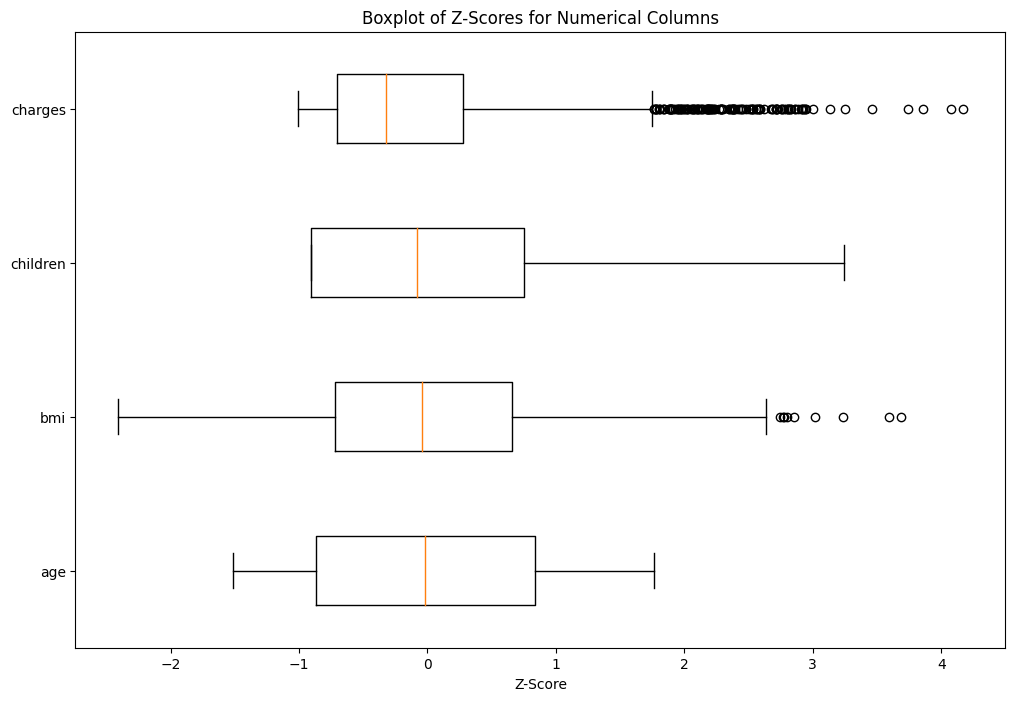

In [12]:
# outlier detection
z_scores = zscore(df[numerical_columns])

z_scores_df = pd.DataFrame(z_scores, columns=numerical_columns)

plt.figure(figsize=(12, 8))
plt.boxplot(z_scores_df.values, labels=numerical_columns, vert=False)
plt.title('Boxplot of Z-Scores for Numerical Columns')
plt.xlabel('Z-Score')
plt.show()

In [13]:
import pandas as pd

def remove_outliers_iqr(df, threshold=1.5):
    # Create a copy of the original DataFrame
    outliers_removed_df = df.copy()
    
    # Loop through each numerical column
    for col in outliers_removed_df.select_dtypes(include='number').columns:
        # Calculate quartiles
        Q1 = outliers_removed_df[col].quantile(0.25)
        Q3 = outliers_removed_df[col].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out outliers
        outliers_removed_df = outliers_removed_df[(outliers_removed_df[col] >= lower_bound) & (outliers_removed_df[col] <= upper_bound)]
    
    return outliers_removed_df


df_outliers_removed = remove_outliers_iqr(df)
df_outliers_removed.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


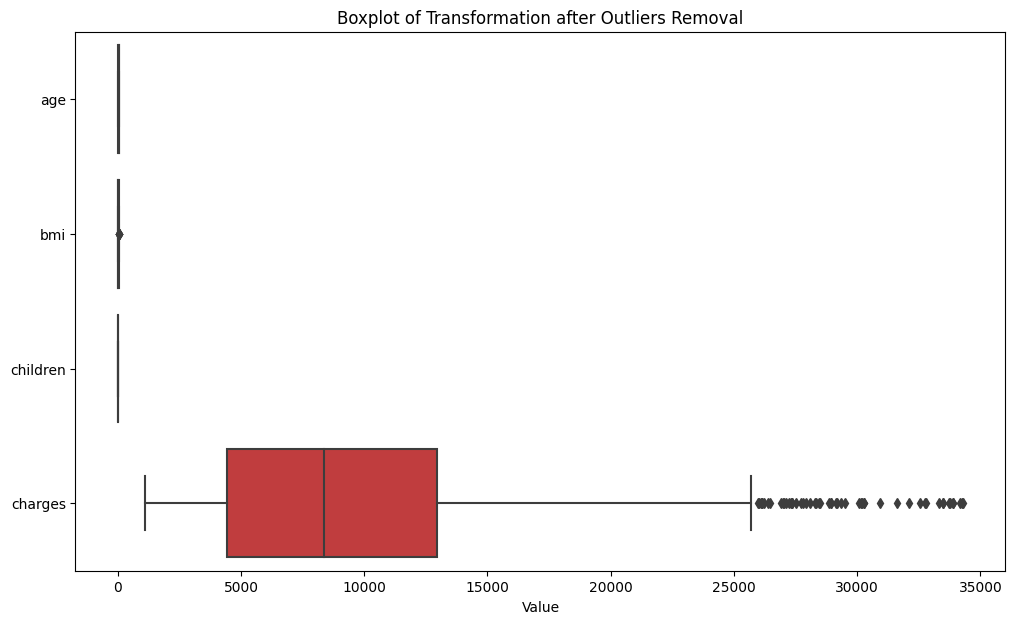

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_outliers_removed, orient="h")
plt.title("Boxplot of Transformation after Outliers Removal")
plt.xlabel("Value")
plt.show()

<Axes: xlabel='charges', ylabel='Density'>

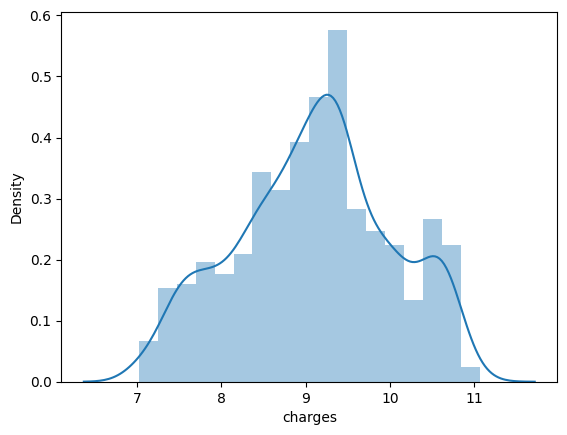

In [15]:
sns.distplot(np.log1p(df['charges']))

In [16]:
# Performing univariate analysis
df.apply(lambda x: len(x.unique()))

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [17]:
num = df.select_dtypes(include = "number")
num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [18]:
corel = num.corr()
corel

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


<Axes: >

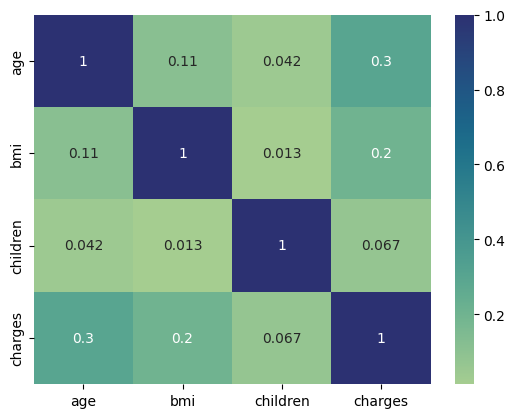

In [19]:
# Exploratory Data Analysis
sns.heatmap(corel, cmap = "crest", annot = True)

- As the intensity of color increases, correlation increases

In [20]:
# Encoding Categorical columns
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['sex'].head()

0    0
1    1
2    1
3    1
4    1
Name: sex, dtype: int64

In [21]:
df['smoker'] = le.fit_transform(df['smoker'])
df['smoker'].head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [22]:
dfm = pd.get_dummies(df['region'], drop_first = True, prefix = 'region').astype(int)
dfm

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [23]:
df.drop(['region'], axis = 1, inplace = True)

In [24]:
df1 = pd.concat([df,dfm],axis = 1)
df1

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


In [25]:
X = df1.drop(['charges'],axis = 1)
y = df1['charges']
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


In [26]:
#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [27]:
print("shape of X_train: ",X_train.shape)
print('*'* 50)
print("shape of X_test: ",X_test.shape)
print('*'* 50)
print("shape of y_train: ",y_train.shape)
print('*'* 50)
print("shape of y_test: ",y_test.shape)
print('*'* 50)

shape of X_train:  (1069, 8)
**************************************************
shape of X_test:  (268, 8)
**************************************************
shape of y_train:  (1069,)
**************************************************
shape of y_test:  (268,)
**************************************************


In [28]:
# Scaling the data
scaler = StandardScaler()

In [29]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)
X_train_scaled.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,1.489407,0.962354,0.414116,1.585550,-0.532272,-0.556820,1.642852,-0.568348
1,1.489407,-1.039118,-1.096822,-0.920541,-0.532272,1.795911,-0.608698,-0.568348
2,0.631515,-1.039118,-0.543228,-0.085177,-0.532272,-0.556820,-0.608698,-0.568348
3,-1.441724,0.962354,0.712141,-0.920541,1.878739,-0.556820,-0.608698,1.759484
4,-1.441724,-1.039118,-0.290156,-0.920541,1.878739,1.795911,-0.608698,-0.568348


- Linear Regressor

In [30]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
preds = lr.predict(X_test)
preds

array([36329.80441468, 12675.96788246, 14065.03655716, 11672.59262387,
       11066.48543212,  2352.487027  ,  4628.89818925, 12504.61653927,
        9963.02970456, 34401.77805851, 10363.85819768,  4632.26820322,
       10623.05384197,  9292.12332929,  2924.75686942, 13367.31443316,
        3115.53658057, 32456.34852229, 16446.96872684, 15882.27060341,
        6101.92918638, 18632.43957785,  8912.60432829, 10252.75890862,
        6891.10440421, 35478.10816047,  9683.74459568, 40370.88723389,
        5907.04772711,  3881.97575569, 15732.02075362,  3751.39022728,
        4100.98670982, 10703.23796223,  2254.94002888,  4357.02033887,
       30402.16218188, 10832.58690594, 12404.76095538, 11214.06661618,
       34517.99286121,  -314.68015273, 10821.58166987, 33561.72887761,
       17878.26275901, 12772.18611849, 15277.15473414,  3770.51946208,
        6442.53017326,  9231.63894793, 12821.9196102 , 12723.43675935,
       11118.95156222, 13207.37919867,  9462.67572037,   670.7347327 ,
      

In [32]:
res = mean_squared_error(y_test,preds)
res

32368228.832193177

In [33]:
r_res = r2_score(y_test,preds)
r_res

0.7497814388540696

In [34]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [35]:
preds = dtree.predict(X_test)
preds


array([43896.3763 , 11842.62375, 10928.849  ,  5649.715  ,  5699.8375 ,
        3213.62205,  1532.4697 , 25517.11363, 12222.8983 , 24667.419  ,
       13012.20865, 11884.04858,  9863.4718 ,  8615.3    ,  1137.011  ,
       13457.9608 ,  4500.33925, 37607.5277 , 20462.99766, 15170.069  ,
        4137.5227 , 13470.86   , 17929.30337,  7726.854  ,  4846.92015,
       48885.13561,  8410.04685, 48517.56315,  4894.7533 ,  2483.736  ,
        9549.5651 ,  3756.6216 ,  4949.7587 , 30284.64294,  1621.8827 ,
        2438.0552 , 36197.699  , 13451.122  ,  5124.1887 , 15828.82173,
       24667.419  ,  2103.08   , 10702.6424 , 39556.4945 , 13405.3903 ,
       12730.9996 , 10848.1343 ,  5227.98875,  9566.9909 , 11345.519  ,
       13143.33665, 11881.9696 ,  9850.432  , 24915.04626, 21232.18226,
        2395.17155,  2850.68375, 11743.9341 ,  5926.846  , 14394.5579 ,
        9724.53   , 24227.33724, 23082.95533,  5312.16985, 18903.49141,
        4949.7587 ,  1880.487  , 41661.602  , 10197.7722 , 28923

In [36]:
res_tree = mean_squared_error(y_test,preds)
res_tree

46396329.40745603

In [37]:
rr_tree = r2_score(y_test,preds)
rr_tree

0.6413389547209383

### Random Forest

In [38]:
rfor = RandomForestRegressor()
rfor.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
preds_ran = rfor.predict(X_test)
preds_ran

array([47893.6479614 , 12167.6707866 , 12878.5263236 ,  9636.1220168 ,
        6429.3140381 ,  5723.2846643 ,  2799.1333578 , 15846.9755837 ,
       11867.759003  , 24008.2912855 , 14259.4449322 ,  8202.2936066 ,
       12950.1613589 ,  9840.9295367 ,  1173.133874  , 13656.0461176 ,
        5874.3602062 , 41572.706843  , 16350.5979982 , 18442.9069727 ,
        5143.7292441 , 16212.5566049 , 14418.69816   ,  9087.4529859 ,
        6740.811656  , 43880.2046957 ,  9500.4715357 , 48047.760583  ,
        5078.758823  ,  3766.8774687 , 10166.4884116 ,  3880.8403625 ,
        6876.6757366 , 18517.8875541 ,  2132.15265748,  1923.657838  ,
       39374.4454083 , 14693.2135822 , 10869.3135984 , 11108.9367916 ,
       24606.1696609 ,  2101.9758418 , 12071.2115344 , 40911.654845  ,
       14331.5880358 , 12732.2206815 , 12793.2971176 ,  5368.1985117 ,
       10180.9492813 , 11395.605409  , 13843.9975531 , 15676.0150619 ,
       12774.6983206 ,  9544.7334397 , 15562.2554714 ,  4009.0897143 ,
      

In [40]:
rand_res = mean_squared_error(y_test,preds)
rand_res

46396329.40745603

In [41]:
# R2_score shows that the RandomForestRegressor can only explain 85% of the data
rr_rand = r2_score(y_test, preds_ran)
rr_rand

0.8320042728581831